In [211]:
################################################################
################################################################
#Company: Critical Techworks (CTW)
#Course: 7th. Data Academy lisbon - PT
#Module: Machine Learning & Artificial Intelligence
#Author: Carlos Fernando Arraz | Date: May 16th, 2024
#Lab 5: Linear Regression 
################################################################

---

**INSTRUCTIONS:**

---

1 - Make a copy of this file in your repository to start practicing;

2 - Study and review the theoretical content (highlighted: concepts of probability, Bayes' theorem, conditional probability, and joint probability);

3 -Read the theory and follow the Python script line by line and its comments (execute the cells with **shift + ENTER** or play button to the left of each command/code block), studying the structures, the parts of the algorithm and the proposed logic;

4 - Execute, modify, test, and experiment with the content to the fullest to internalize the knowledge.

Este roteiro de prática guiada contém uma sequência de blocos de código em Python 🐍 que aplica os conhecimentos teóricos sobre regressão linear simples e múltipla. Em seguida, iremos comparar com os resultados de bibliotecas consagradas do Python, a exemplo da Scikit-Learn, SciPy e Statsmodels.



**Orientações:**

Este roteiro de prática está dividivo em **3 partes**:
Na **parte I**, carregar dados e aplicar reg. linear usando a biblioteca Scikit-Learn. Na **parte II**, veremos como obter os coeficientes $\beta_0$ e $\beta_1$ através do uso da teoria das pseudoinversas (teoria das matrizes inversas generalizadas). E por fim, na **Parte III**, iremos estender o conceitos para modelos de regressão linear com 2 ou mais variáveis e aplicar algus dos conceitos vistos usando bibliotecas Python 🐍 consagradas no tema em estudo.

**Parte I**: Carregar base de dados do Lab 4 e aplicar o modelo de regressão linear com 1 variável no scikit-learn.

In [255]:
#Importar as bibliotecas python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [256]:
#Carregar base de dados que criamos da web
df = pd.read_csv('nba_revenue_valuation.csv', header=0)

#Ver as primeiras linhas do dataframe
df.head()

,Rank,Swing[a],Team,Territory,Value[b],Change[c],Debt[d],Revenue[e],Operating Income[f]
0,1,2.0,Golden State Warriors,California,7.70,100%,16%,765,$206 million
1,2,1.0,New York Knicks,New York,6.60,52.5%,4%,452,$155 million
2,3,1.0,Los Angeles Lakers,California,6.40,59.5%,1%,465,$115 million
3,4,NaN,Boston Celtics,Massachusetts,4.70,42.9%,5%,361,$326.5 million
4,5,3.0,Los Angeles Clippers,California,4.65,77.3%,2%,362,$12 million


In [257]:
df.columns

Index(['Rank', 'Swing[a]', 'Team', 'Territory', 'Value[b]', 'Change[c]',
       'Debt[d]', 'Revenue[e]', 'Operating Income[f]'],
      dtype='object')

In [258]:
df = df.drop(columns=['Rank', 'Swing[a]', 'Territory', 'Change[c]', 'Debt[d]', 'Operating Income[f]'])

In [259]:
df.head()

,Team,Value[b],Revenue[e]
0,Golden State Warriors,7.70,765
1,New York Knicks,6.60,452
2,Los Angeles Lakers,6.40,465
3,Boston Celtics,4.70,361
4,Los Angeles Clippers,4.65,362


In [260]:
#Renomear as colunas com x e y
df = df.rename({'Revenue[e]': 'x', 'Value[b]': 'y'}, axis='columns',)


In [261]:
df.columns

Index(['Team', 'y', 'x'], dtype='object')

In [262]:
#Tratar dados para consseguir aplicar os modelos
#df = df.apply(lambda x: x.str.replace(',','.'))

In [263]:
df.iloc[:, 1:3] = df.iloc[:,1:3].applymap(lambda x: np.array(x).astype('float'))

In [264]:
df.head()

,Team,y,x
0,Golden State Warriors,7.70,765.0
1,New York Knicks,6.60,452.0
2,Los Angeles Lakers,6.40,465.0
3,Boston Celtics,4.70,361.0
4,Los Angeles Clippers,4.65,362.0


In [265]:
#Separar variáveis dependentes das variáveis independentes
x = df.x; y = df.y

In [266]:
x.shape

(30,)

In [267]:
#Ajustar as dimensões de x e y para atender requisitos da bibl. Scikit-Learn
x = np.array(df.x).reshape(-1,1)
y = np.array(df.y).reshape(-1,1)

In [268]:
x.shape

(30, 1)

b0: [-1.49486767] b1: [[0.01395463]]


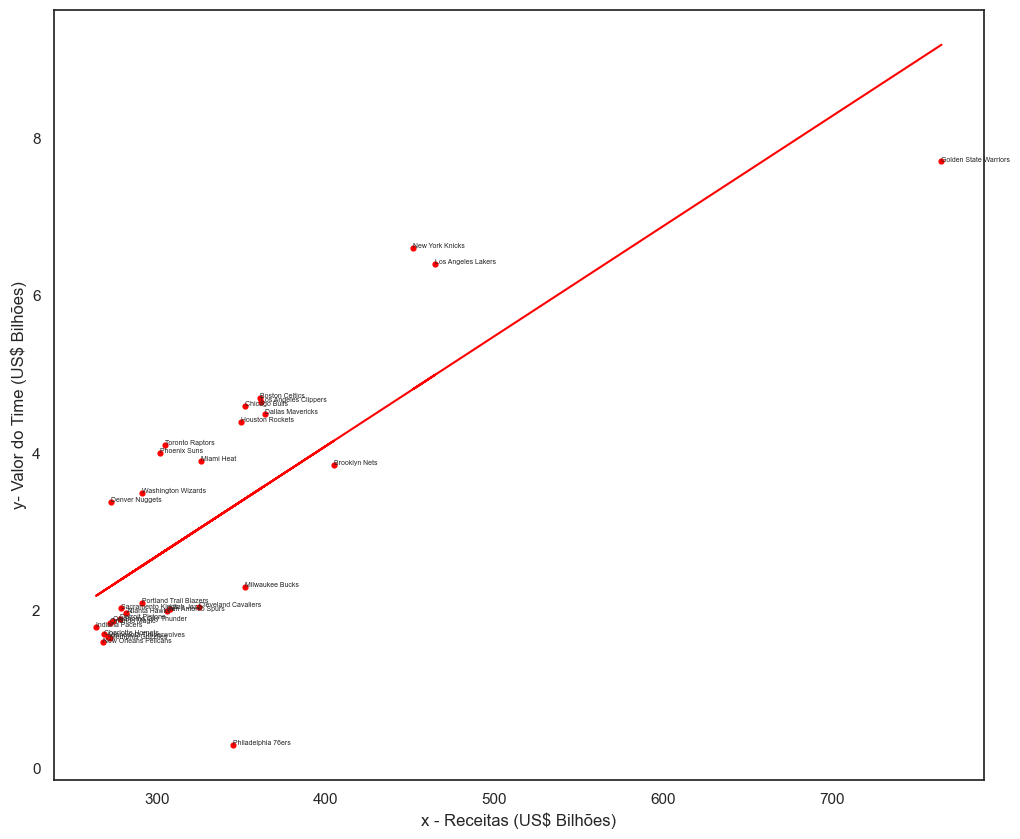

In [269]:
#Comparação com o método doa bibl. Scikit-learn
from sklearn.linear_model import LinearRegression

#Instanciar o objeto LinearRegression da Scikit-learn
reg = LinearRegression()
reg.fit(x, y)

#Imprimir os resultados
print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))

#Plotar o gráfico
plt.figure(figsize=(12,10))
plt.scatter(x, y, s=12, color='red')
plt.plot(x, reg.predict(x), c='red',  )
plt.xlabel('x - Receitas (US$ Bilhões)')
plt.ylabel('y- Valor do Time (US$ Bilhões)')
# plt.legend()
for index in range(len(x)):
  plt.text(x[index], y[index], df.Team[index], size=5)

**Parte II:**
Encontre os parâmetros da regressão linear com pseudoinversa, a fim de mostrar uma maneira prática para realização dos cálculos num ambiente computacional.

**Um pouco de teoria:**

Sabemos que sistemas deste tipo $ \vec{y} = X.\vec{\beta}$ podem ser resolvidos pela pseudoiversa, tal como segue:

$ \vec{y} = X.\vec{\beta} \implies X^T.\vec{y} = X^T.X.\vec{\beta} \implies (X^T.X.)^{-1}.X^T.\vec{y} = (X^T.X.)^{-1}.X^T.X.\vec{\beta} \implies (X^T.X.)^{-1}.X^T.\vec{y} = \vec{\beta}$

Ou seja, na prática, temos operações com inversas de uma matriz e transpostas, e estas (por sorte !!! 😀) podem ser facilmente usadas no Python, como veremos a seguir:


In [270]:
#Verificar dimensões dos vetores para conseguir fazer as operações
x.shape

(30, 1)

OBS: precisamos criar uma matriz com os pontos da variável independente de $X$ (que representa o coeficiente $\beta_1$) da base de dados e incluir uma coluna para representar o coeficiente de $\beta_0$ (inicializados com 1).

In [271]:
#Criar vetor X para simbolizar a matriz das observações conforme sistema citado acima
X = np.ones((30, 2)); X

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [272]:
#Multiplicar a coluna 1 de X para representar todos os x_i da base de dados
X[:,1] = X[:,1]*x.reshape(30,)

In [273]:
X

array([[  1., 765.],
       [  1., 452.],
       [  1., 465.],
       [  1., 361.],
       [  1., 362.],
       [  1., 352.],
       [  1., 364.],
       [  1., 350.],
       [  1., 345.],
       [  1., 305.],
       [  1., 302.],
       [  1., 326.],
       [  1., 405.],
       [  1., 291.],
       [  1., 273.],
       [  1., 352.],
       [  1., 291.],
       [  1., 325.],
       [  1., 279.],
       [  1., 308.],
       [  1., 306.],
       [  1., 282.],
       [  1., 278.],
       [  1., 274.],
       [  1., 272.],
       [  1., 264.],
       [  1., 269.],
       [  1., 271.],
       [  1., 272.],
       [  1., 268.]])

In [274]:
#Verificar se temos uma matriz com 30 observações e 2 colunas (representa os coeficientes b0 e b1)
X.shape

(30, 2)

In [275]:
#Verificar as dimensões de y (variável resposta)
y.shape

(30, 1)

Agora, realizar os cálculos conforme fórmula da pseudoinversa

$(X^T.X.)^{-1}.X^T.\vec{y} = \vec{\beta}$


In [276]:
#Fazer os calculos conforme
XT_X_inv = np.linalg.inv(np.dot(X.T, X))
XT = X.T


In [277]:
#calcular a pseudoinversa para encontrar os valores dos coeficientes b0 e b1
Beta = np.dot(np.dot(XT_X_inv, XT), y.reshape(30))

In [278]:
#Usar metodo da pseudoinversa diretamente com suporte da biblioteca numpy
X_pinv = np.linalg.pinv(X)

In [279]:
np.dot(X_pinv, y.reshape(30,))

array([-1.49486767,  0.01395463])

In [280]:
from IPython.display import display, Markdown
display(Markdown(rf"O valor de $\beta_0$ é {Beta[0]} e o valor de $\beta_1$ é {Beta[1]}"))

O valor de $\beta_0$ é -1.4948676743082268 e o valor de $\beta_1$ é 0.01395463458263502

Comparando resultados com os resultados obtidos por bibliotecas Python consagradas, com é o caso da Scikit-Learn

In [281]:
#Instanciar o objeto LinearRegression da Scikit-learn
reg = LinearRegression()
reg.fit(x, y)

#Imprimir os resultados
display(Markdown(rf"Usando o Scikit-Learn: O valor de $\beta_0$ é {reg.intercept_[0]} e o valor de $\beta_1$ é {reg.coef_[0][0]}"))

Usando o Scikit-Learn: O valor de $\beta_0$ é -1.4948676743082197 e o valor de $\beta_1$ é 0.013954634582635015

**Parte III:**
Introdução do modelo de regressão linear com múltiplas variáveis, estendendo os conceitos vistos nas partes anteriores. Usaremos aqui uma base de dados da referência [1].

In [282]:
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [283]:
df.drop(df.columns[0], axis=1, inplace=True);df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Agora, vamos realizar os cálculos conforme fórmula da pseudoinversa

$(X^T.X.)^{-1}.X^T.\vec{y} = \vec{\beta}$


In [284]:
df.shape

(200, 4)

In [285]:
#Criar vetor X para simbolizar a matriz das observações conforme sistema citado acima
X = np.ones((200, 4)); X

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],


In [286]:
#Multiplicar a coluna 1 de X para representar todos os x_i da base de dados
X[:,1:4] = X[:,1:4]*df[df.columns[0:3]]

In [287]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [288]:
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [289]:
y = df.sales; y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [290]:
#Fazer os calculos conforme
XT_X_inv = np.linalg.inv(np.dot(X.T, X))
XT = X.T

In [291]:
#calcular a pseudoinversa para encontrar os valores dos coeficientes b0 e b1
Beta = np.dot(np.dot(XT_X_inv, XT), y); Beta

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [292]:
#Usar metodo da pseudoinversa diretamente
X_pinv = np.linalg.pinv(X)

In [293]:
np.dot(X_pinv, y)

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [294]:
from IPython.display import display, Markdown
display(Markdown(rf"O valor de $\beta_0$ é {Beta[0]} e o valor de $\vec \beta$ é {Beta[1:]}"))

O valor de $\beta_0$ é 2.9388893694594476 e o valor de $\vec \beta$ é [ 0.04576465  0.18853002 -0.00103749]

Usando a biblioteca Scikit-Learn

In [295]:
#Instanciar o objeto LinearRegression da Scikit-learn
reg = LinearRegression()
reg.fit(df[df.columns[0:3]], df.sales)

#Imprimir os resultados
print('Ordem das variáveis indep. calculadas', reg.feature_names_in_, '\n')
from IPython.display import display, Markdown
display(Markdown(rf"Usando o Scikit-Learn: O valor de $\beta_0$ é {reg.intercept_} e o valor de $\vec \beta$ é {reg.coef_}  "))

Ordem das variáveis indep. calculadas ['TV' 'radio' 'newspaper'] 



Usando o Scikit-Learn: O valor de $\beta_0$ é 2.9388893694594067 e o valor de $\vec \beta$ é [ 0.04576465  0.18853002 -0.00103749]  

**OBS:**

Esta parte é uma introdução para a próxima prática, mas já pode ser verificado que os coeficientes obtidos são iguais (ver imagem a seguir em destaque) aos obtidos pela biblioteca Scikit-Learn, ou até mesmo usando a solução das pseudoinversas, não é demais !!!

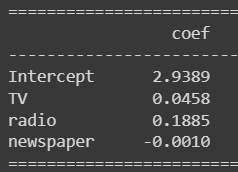

**Usando a biblioteca statsmodels**

As informações mostradas aqui estão com mais detalhes, mas podem limitar a busca no valor dos coeficientes por enquanto e a significância estatística para cada valor estimado dos coeficientes. Vamos lá!

In [296]:
import numpy as np
import statsmodels.formula.api as sm

In [297]:
results = sm.ols("sales~TV+radio+newspaper" , data=df).fit()

In [298]:
#Ver resultado completo da biblioteca statsmodels
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.58e-96
Time:                        00:14:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

**Referências:**

[1] Gareth  James,  Daniela  Witten,  Trevor  Hastie  and  Robert  Tibshirani, “An  Introduction  to Statistical Learning, with Applications in R”, Springer Texts in Statistics, Springer, 2013.

[2] MORETTIN, Pedro A.; BUSSAB, Wilton O. Estatística básica. Saraiva Educação SA, 2017.

[3] VANDERPLAS, Jake. Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.", 2016.
